In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import sys
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline 

# data 출처 : Google BigQuery NYC 2015 taxi data
df = pd.read_csv('15JAN_taxidata.csv')

In [8]:
df.drop(['tpep_pickup_datetime', 'pickup_time'], axis = 1, inplace = True)

In [9]:
df.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis = 1, inplace = True)

In [10]:
df.head()

,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,payment_type,tip_amount,total_amount,pickup_date,pickup_hour
0,2015-01-08 22:50:56,1,1.55,-73.987686,40.724251,-73.973763,40.743378,2,0.0,8.8,2015-01-08,22
1,2015-01-08 22:51:17,3,1.20,-73.991570,40.726933,-74.004105,40.721081,2,0.0,8.3,2015-01-08,22
2,2015-01-08 22:55:27,1,2.40,-73.981918,40.783443,-73.952354,40.798199,2,0.0,11.8,2015-01-08,22
3,2015-01-08 22:58:09,1,7.30,-73.973122,40.743553,-73.919571,40.832001,2,0.0,22.8,2015-01-08,22
4,2015-01-08 22:46:16,1,0.40,-73.982948,40.766209,-73.984390,40.764053,2,0.0,4.8,2015-01-08,22


In [11]:
df_payment = df[(df.payment_type == 1) | (df.payment_type == 2)]

In [6]:
df_payment.head()

,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,payment_type,tip_amount,total_amount,pickup_date,pickup_hour
0,2015-01-08 22:50:56,1,1.55,-73.987686,40.724251,-73.973763,40.743378,2,0.0,8.8,2015-01-08,22
1,2015-01-08 22:51:17,3,1.20,-73.991570,40.726933,-74.004105,40.721081,2,0.0,8.3,2015-01-08,22
2,2015-01-08 22:55:27,1,2.40,-73.981918,40.783443,-73.952354,40.798199,2,0.0,11.8,2015-01-08,22
3,2015-01-08 22:58:09,1,7.30,-73.973122,40.743553,-73.919571,40.832001,2,0.0,22.8,2015-01-08,22
4,2015-01-08 22:46:16,1,0.40,-73.982948,40.766209,-73.984390,40.764053,2,0.0,4.8,2015-01-08,22


In [12]:
def func(x) :
    if x in ['2015-01-02', '2015-01-03', '2015-01-09', '2015-01-10', '2015-01-16', '2015-01-17', '2015-01-23', '2015-01-24', '2015-01-30', '2015-01-31']:
        return True
    else :
        return False
    
df_payment["is_weekend"] = df_payment["pickup_date"].apply(lambda x : func(x))

In [8]:
df_payment.head()

,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,payment_type,tip_amount,total_amount,pickup_date,pickup_hour,is_weekend
0,2015-01-08 22:50:56,1,1.55,-73.987686,40.724251,-73.973763,40.743378,2,0.0,8.8,2015-01-08,22,False
1,2015-01-08 22:51:17,3,1.20,-73.991570,40.726933,-74.004105,40.721081,2,0.0,8.3,2015-01-08,22,False
2,2015-01-08 22:55:27,1,2.40,-73.981918,40.783443,-73.952354,40.798199,2,0.0,11.8,2015-01-08,22,False
3,2015-01-08 22:58:09,1,7.30,-73.973122,40.743553,-73.919571,40.832001,2,0.0,22.8,2015-01-08,22,False
4,2015-01-08 22:46:16,1,0.40,-73.982948,40.766209,-73.984390,40.764053,2,0.0,4.8,2015-01-08,22,False


In [13]:
import scipy.stats as stats

In [14]:
payment_isweekend = pd.crosstab(df_payment.payment_type, df_payment.is_weekend)
payment_isweekend

is_weekend,False,True
payment_type,,
1,5075747,2799528
2,3025038,1783953


In [11]:
stats.chi2_contingency(observed = payment_isweekend)
# 평일에 더 많이 쓴다

(3099.761740429626,
 0.0,
 1,
 array([[5029531.04191248, 2845743.95808752],
        [3071253.95808752, 1737737.04191248]]))

In [15]:
df_payment.pickup_hour = pd.to_numeric(df_payment.pickup_hour)

def fun(x) :
    if 9 >= x > 6 or 19 >= x > 16:
        return 'commute'
    elif 16 >= x > 9:
        return 'daytime'
    elif 23 >= x > 19:
        return 'evening'
    else:
        return 'dawn'
    
df_payment["time"] = df_payment["pickup_hour"].apply(lambda x : fun(x))

In [13]:
df_payment.head(20)

,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,payment_type,tip_amount,total_amount,pickup_date,pickup_hour,is_weekend,time
0,2015-01-08 22:50:56,1,1.55,-73.987686,40.724251,-73.973763,40.743378,2,0.00,8.80,2015-01-08,22,False,evening
1,2015-01-08 22:51:17,3,1.20,-73.991570,40.726933,-74.004105,40.721081,2,0.00,8.30,2015-01-08,22,False,evening
2,2015-01-08 22:55:27,1,2.40,-73.981918,40.783443,-73.952354,40.798199,2,0.00,11.80,2015-01-08,22,False,evening
3,2015-01-08 22:58:09,1,7.30,-73.973122,40.743553,-73.919571,40.832001,2,0.00,22.80,2015-01-08,22,False,evening
4,2015-01-08 22:46:16,1,0.40,-73.982948,40.766209,-73.984390,40.764053,2,0.00,4.80,2015-01-08,22,False,evening
5,2015-01-08 22:48:33,1,0.71,-73.982498,40.764019,-73.974648,40.757778,2,0.00,6.30,2015-01-08,22,False,evening
6,2015-01-08 22:51:35,1,1.60,-73.972160,40.759346,-73.986076,40.740147,1,1.20,10.00,2015-01-08,22,False,evening
7,2015-01-08 22:46:37,1,0.52,-73.972679,40.793289,-73.971283,40.797062,1,0.90,6.20,2015-01-08,22,False,evening
8,2015-01-08 22:55:05,3,6.23,-74.011490,40.702728,-73.959473,40.762882,1,3.80,23.60,2015-01-08,22,False,evening
9,2015-01-08 22:59:12,1,5.88,-73.928719,40.743889,-73.855217,40.727779,1,5.00,80.30,2015-01-08,22,False,evening


In [16]:
distance_cut_point = df.trip_distance.quantile(0.95)
df_cut=df_payment[(df.trip_distance < distance_cut_point) & (df.passenger_count < 7)]

In [17]:
payment_time = pd.crosstab(df_payment.payment_type, df_payment.time)

In [16]:
payment_time

time,commute,dawn,daytime,evening
payment_type,,,,
1,2451816,1120069,2510676,1792714
2,1402477,696431,1789853,920230


In [17]:
stats.chi2_contingency(observed = payment_time)

# daytime에 유독 낮고, evening에 유독 높음 -> daytime에 promotion 하는 게 어떨지?

(47424.7956211462,
 0.0,
 3,
 array([[2393013.3052693 , 1127809.60581401, 2670067.66654649,
         1684384.4223702 ],
        [1461279.6947307 ,  688690.39418599, 1630461.33345351,
         1028559.5776298 ]]))

In [19]:
payment_passenger = pd.crosstab(df_cut.payment_type, df_cut.passenger_count)

In [20]:
payment_passenger

passenger_count,1,2,3,4,5,6
payment_type,,,,,,
1,5334787,1016647,289238,127491,409349,265324
2,3182591,686189,210550,111494,250837,166332


In [21]:
stats.chi2_contingency(observed = payment_passenger)

# 1->2->3->4 갈수록 현저히 낮아짐.

(16200.185958880204,
 0.0,
 5,
 array([[5260505.11578979, 1051705.9932471 ,  308679.1886905 ,
          147601.97505582,  407744.24128796,  266599.48592881],
        [3256872.88421021,  651130.0067529 ,  191108.8113095 ,
           91383.02494418,  252441.75871204,  165056.51407119]]))

In [22]:
distance_card = df_cut[df.payment_type == 1].trip_distance
distance_cash = df_cut[df.payment_type == 2].trip_distance

from scipy.stats import levene
print('Homogeneity of Variance Test p-value = ', levene(distance_card, distance_cash)[1])

tTestResult = stats.ttest_ind(distance_card, distance_cash, equal_var=False)
print("t-statistic : %.3f  p-value : %.3f" % tTestResult)

# 등분산성 만족 안해서 welch t-test

Homogeneity of Variance Test p-value =  0.0
t-statistic : 317.306  p-value : 0.000


In [23]:
distance_card.mean()

2.283489175362416

In [24]:
distance_cash.mean()

1.956628547395533

In [20]:
# 번외 카드 많이 사용하는 지역 지도?

import folium
base_map = folium.Map(location=[40.730610, -73.935242], control_scale=True, zoom_start=11)

In [ ]:
from folium.plugins import HeatMap
    
HeatMap(data = df[(df.payment_type == 1)][['pickup_latitude', 'pickup_longitude']], radius=10, max_zoom=11).add_to(base_map)

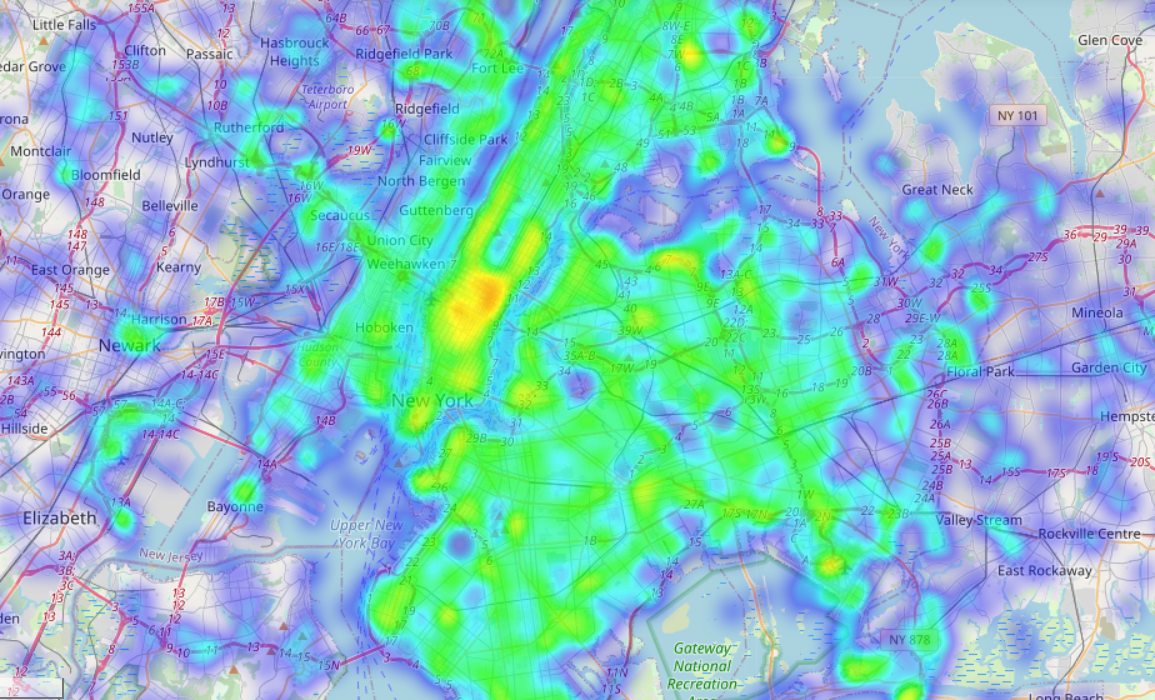

In [22]:
from IPython.display import Image
Image(filename ="heatmap_이엘리엇.png")

In [3]:
# 2020년 1월 탑승인원별 카드결제 양상

df_2020 = pd.read_csv('yellow_tripdata_2020-01.csv')
df_2020.dropna(subset = ['passenger_count', 'payment_type'], how = 'any', inplace = True)
df_2020 = df_2020[(df_2020.payment_type == 1) | (df_2020.payment_type == 2)]
distance_cut_point_2020 = df_2020.trip_distance.quantile(0.95)
df_2020_cut=df_2020[(df_2020.trip_distance < distance_cut_point_2020) & (df_2020.passenger_count < 7)]
payment_passenger = pd.crosstab(df_2020_cut.payment_type, df_2020_cut.passenger_count)
payment_passenger

passenger_count,0.0,1.0,2.0,3.0,4.0,5.0,6.0
payment_type,,,,,,,
1.0,79576,3233121,646225,169168,77971,160218,92551
2.0,26969,1058902,238936,66048,37753,54289,32438
